<h1 style='background:brown; border:0; color:white'><center>⚽FIFA 20-EDA⚽</center><h1>



---

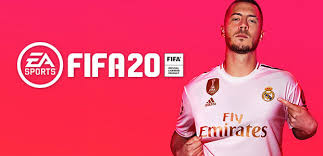


FIFA 20 is a football simulation video game published by Electronic Arts as part of the FIFA series. It is the 27th installment in the FIFA series, and was released on 27 September 2019 for Microsoft Windows, PlayStation 4, Xbox One, and Nintendo Switch. 


Real Madrid winger Eden Hazard was named the new cover star of the Regular Edition, with Liverpool defender Virgil van Dijk on the cover of the Champions Edition.Former Juventus and Real Madrid midfielder Zinedine Zidane was later named as the cover star for the Ultimate Edition.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import textwrap
from math import pi
import seaborn as sns
sns.set_style(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')

# **1. Data Exploration**

In [2]:
fifa_20 = pd.read_csv('../input/fifa-20-complete-player-dataset/players_20.csv')

In [3]:
fifa_20.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [4]:
fifa_20.shape # To check no of rows and columns

(18278, 104)

In [5]:
col = list(fifa_20.columns)  # To print all the columns
print(col)

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

In [6]:
useless_column = ['dob','sofifa_id','player_url','long_name','body_type','real_face','nation_position','loaned_from','nation_jersey_number']

In [7]:
fifa_20 = fifa_20.drop(useless_column, axis = 1)

In [8]:
fifa_20.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,player_tags,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,164700000.0,NaN,GK,13.0,2014-07-16,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [9]:
fifa_20.shape # To check how many columns did we dropped

(18278, 95)

In [10]:
fifa_20['BMI'] = fifa_20 ['weight_kg'] / (fifa_20['height_cm'] / 100) ** 2

# **2. Data Cleaning**

In [11]:
fifa_20[['short_name','player_positions']]

,short_name,player_positions
0,L. Messi,"RW, CF, ST"
1,Cristiano Ronaldo,"ST, LW"
2,Neymar Jr,"LW, CAM"
3,J. Oblak,GK
4,E. Hazard,"LW, CF"
...,...,...
18273,Shao Shuai,CB
18274,Xiao Mingjie,CB
18275,Zhang Wei,CM
18276,Wang Haijian,CM


In [12]:
new_player_position = fifa_20['player_positions'].str.get_dummies(sep=',').add_prefix('Position')
new_player_position.head()

,Position CAM,Position CB,Position CDM,Position CF,Position CM,Position LB,Position LM,Position LW,Position LWB,Position RB,Position RM,Position RW,Position RWB,Position ST,PositionCAM,PositionCB,PositionCDM,PositionCF,PositionCM,PositionGK,PositionLB,PositionLM,PositionLW,PositionLWB,PositionRB,PositionRM,PositionRW,PositionRWB,PositionST
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [13]:
fifa_20 =  pd.concat([fifa_20,new_player_position],axis = 1)

In [14]:
fifa_20.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,player_tags,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI,Position CAM,Position CB,Position CDM,Position CF,Position CM,Position LB,Position LM,Position LW,Position LWB,Position RB,Position RM,Position RW,Position RWB,Position ST,PositionCAM,PositionCB,PositionCDM,PositionCF,PositionCM,PositionGK,PositionLB,PositionLM,PositionLW,PositionLWB,PositionRB,PositionRM,PositionRW,PositionRWB,PositionST
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,24.913495,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,23.735308,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,22.204082,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,164700000.0,NaN,GK,13.0,2014-07-16,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.615211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,

In [15]:
fifa_20 =  fifa_20.drop('player_positions',axis=1)

In [16]:
columns = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

In [17]:
fifa_20[columns].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [18]:
for col in columns:
  fifa_20[col]=fifa_20[col].str.split('+',n=1,expand = True)[0]

fifa_20[columns]

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,89,66,63,63,63,66,61,49,49,49,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,32,32,32,31,31,31,31,31,31,31,31,33,33,33,33,33,43,42,42,42,43,45,46,46,46,45
18274,33,33,33,33,32,32,32,33,33,33,33,35,36,36,36,35,44,43,43,43,44,46,47,47,47,46
18275,43,43,43,43,43,43,43,43,44,44,44,45,46,46,46,45,47,49,49,49,47,47,49,49,49,47
18276,43,43,43,45,44,44,44,45,46,46,46,46,46,46,46,46,48,48,48,48,48,48,49,49,49,48


In [19]:
fifa_20[columns] = fifa_20[columns].fillna(0)

In [20]:
fifa_20[columns] = fifa_20[columns].astype(int)

In [21]:
fifa_20[columns]

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,89,66,63,63,63,66,61,49,49,49,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,32,32,32,31,31,31,31,31,31,31,31,33,33,33,33,33,43,42,42,42,43,45,46,46,46,45
18274,33,33,33,33,32,32,32,33,33,33,33,35,36,36,36,35,44,43,43,43,44,46,47,47,47,46
18275,43,43,43,43,43,43,43,43,44,44,44,45,46,46,46,45,47,49,49,49,47,47,49,49,49,47
18276,43,43,43,45,44,44,44,45,46,46,46,46,46,46,46,46,48,48,48,48,48,48,49,49,49,48


In [22]:
columns = ['dribbling','defending','physic','passing','shooting','pace']

In [23]:
fifa_20[columns]

,dribbling,defending,physic,passing,shooting,pace
0,96.0,39.0,66.0,92.0,92.0,87.0
1,89.0,35.0,78.0,82.0,93.0,90.0
2,95.0,32.0,58.0,87.0,85.0,91.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,94.0,35.0,66.0,86.0,83.0,91.0
...,...,...,...,...,...,...
18273,33.0,47.0,51.0,28.0,23.0,57.0
18274,35.0,48.0,48.0,33.0,24.0,58.0
18275,45.0,48.0,51.0,44.0,35.0,54.0
18276,47.0,45.0,52.0,47.0,35.0,59.0


In [24]:
fifa_20[columns].isnull().sum()

dribbling    2036
defending    2036
physic       2036
passing      2036
shooting     2036
pace         2036
dtype: int64

In [25]:
for col in columns:
  fifa_20[col] = fifa_20[col].fillna(fifa_20[col].median())
fifa_20[columns]

,dribbling,defending,physic,passing,shooting,pace
0,96.0,39.0,66.0,92.0,92.0,87.0
1,89.0,35.0,78.0,82.0,93.0,90.0
2,95.0,32.0,58.0,87.0,85.0,91.0
3,64.0,56.0,66.0,58.0,54.0,69.0
4,94.0,35.0,66.0,86.0,83.0,91.0
...,...,...,...,...,...,...
18273,33.0,47.0,51.0,28.0,23.0,57.0
18274,35.0,48.0,48.0,33.0,24.0,58.0
18275,45.0,48.0,51.0,44.0,35.0,54.0
18276,47.0,45.0,52.0,47.0,35.0,59.0


In [26]:
fifa_20 = fifa_20.fillna(0)

In [27]:
fifa_20.isnull().sum()

short_name     0
age            0
height_cm      0
weight_kg      0
nationality    0
              ..
PositionRB     0
PositionRM     0
PositionRW     0
PositionRWB    0
PositionST     0
Length: 124, dtype: int64

# **3.Let's Start with Analysis**

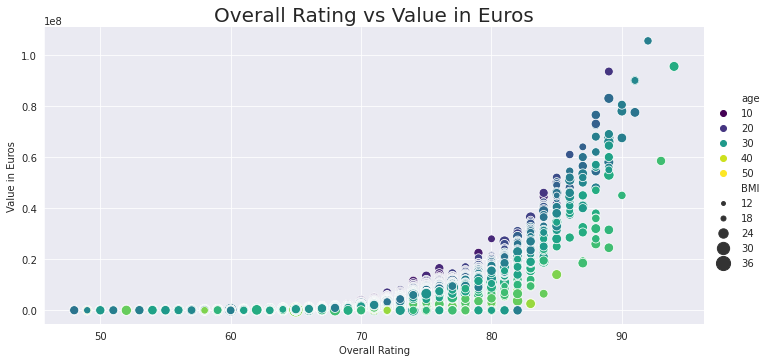

In [28]:
sns.relplot(x='overall',y='value_eur',hue='age',palette = 'viridis',size="BMI", sizes=(15, 200),aspect=2,data=fifa_20)
plt.title('Overall Rating vs Value in Euros',fontsize = 20)
plt.xlabel('Overall Rating')
plt.ylabel('Value in Euros')
plt.show()

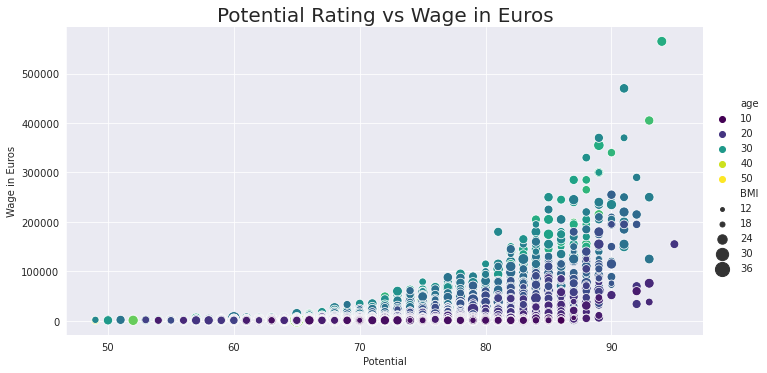

In [29]:
sns.relplot(x='potential',y='wage_eur',hue='age',palette = 'viridis',size="BMI", sizes=(15, 200),aspect=2,data=fifa_20)
plt.title('Potential Rating vs Wage in Euros',fontsize = 20)
plt.xlabel('Potential')
plt.ylabel('Wage in Euros')
plt.show()

Left Preferred 4318
Right Preferred 13960


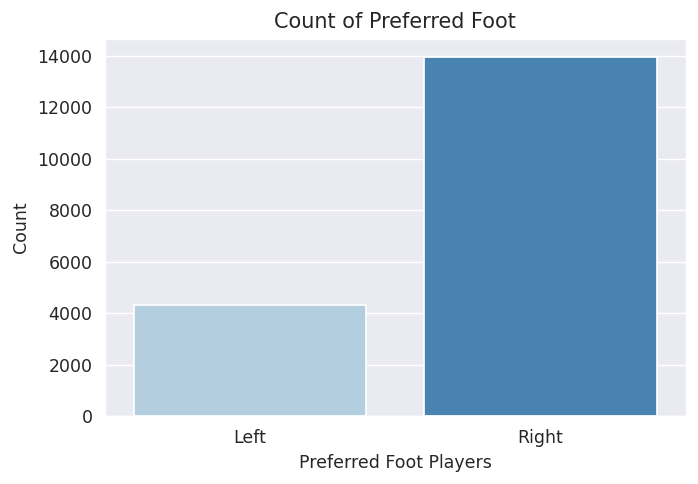

In [30]:
plt.figure(dpi=125)
sns.countplot('preferred_foot',data=fifa_20,palette='Blues')
plt.xlabel('Preferred Foot Players')
plt.ylabel('Count')
plt.title('Count of Preferred Foot')
Right,Left=fifa_20.preferred_foot.value_counts()
print('Left Preferred',Left)
print('Right Preferred',Right)
plt.show()

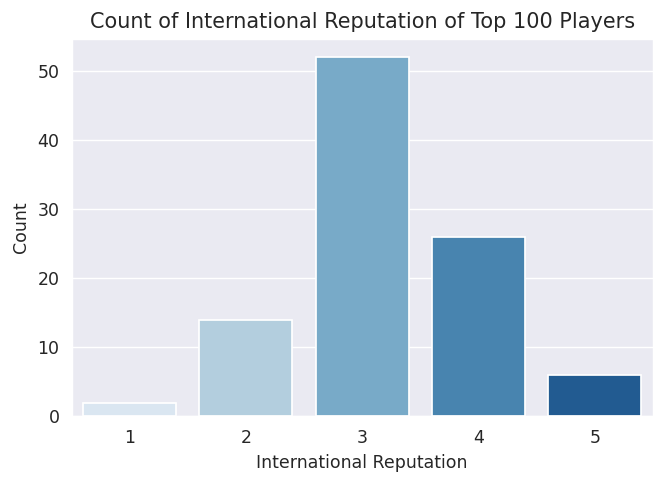

In [31]:
plt.figure(dpi=125)
sns.countplot('international_reputation',data=fifa_20.head(100),palette='Blues')
plt.xlabel('International Reputation')
plt.ylabel('Count')
plt.title('Count of International Reputation of Top 100 Players')
plt.show()

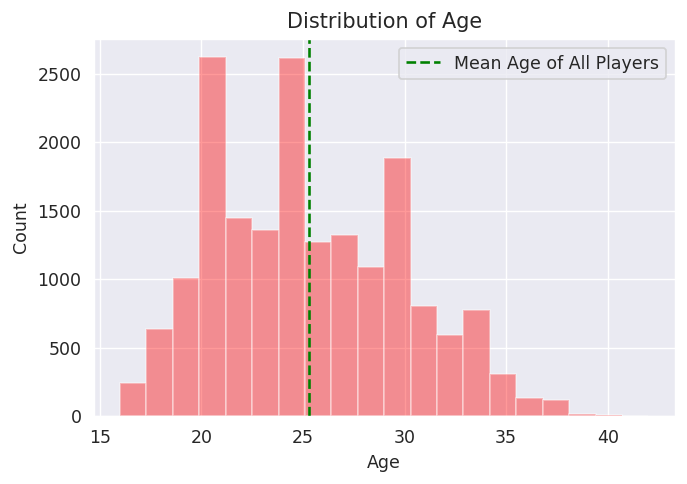

In [32]:
plt.figure(dpi=125)
sns.distplot(a=fifa_20['age'],kde=False,bins=20,color='red')
plt.axvline(x=np.mean(fifa_20['age']),c='green',ls='--',label='Mean Age of All Players')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

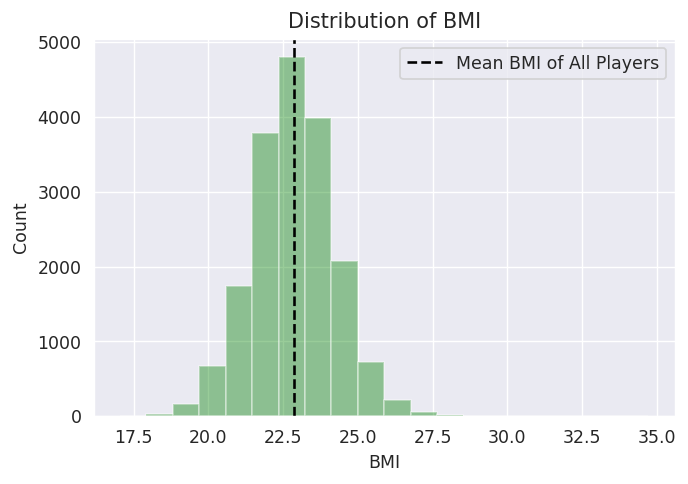

In [33]:
plt.figure(dpi=125)
sns.distplot(a=fifa_20['BMI'],kde=False,bins=20,color='green')
plt.axvline(x=np.mean(fifa_20['BMI']),c='black',ls='--',label='Mean BMI of All Players')
plt.legend()
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI')
plt.show()

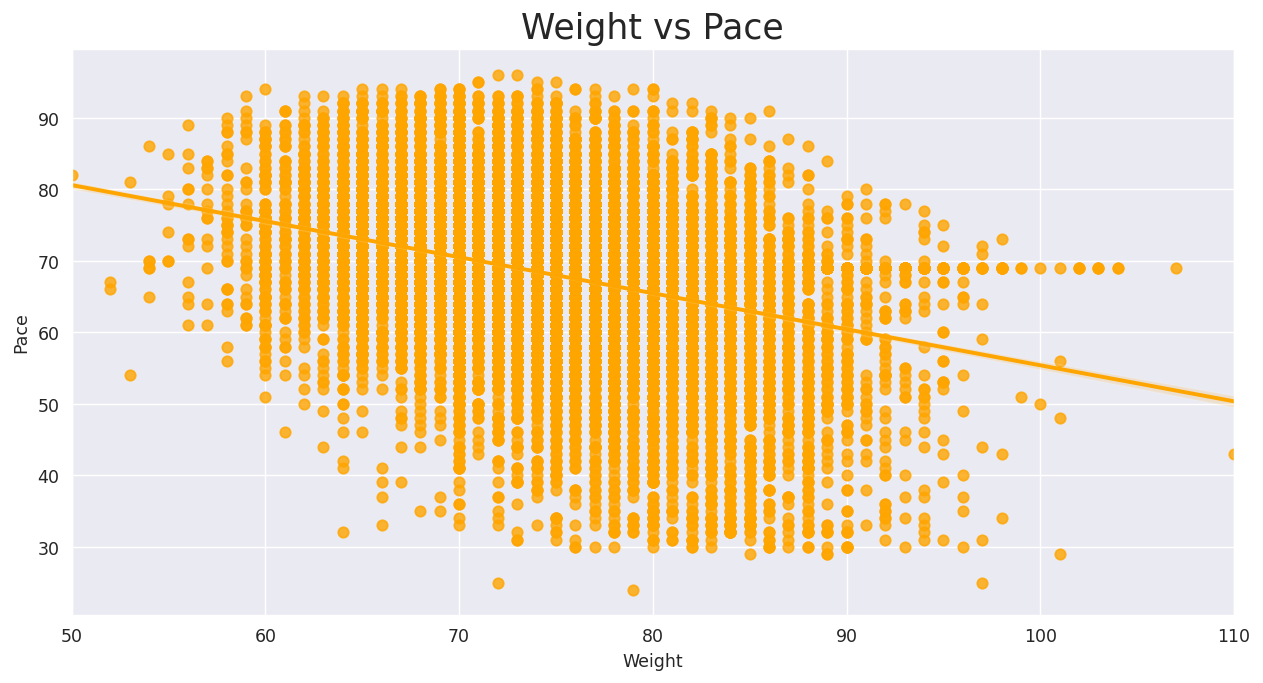

In [34]:
plt.figure(figsize=(12,6),dpi=125)
x=fifa_20['weight_kg']
y=fifa_20['pace']

sns.regplot(x,y,color='orange')
plt.title('Weight vs Pace',fontsize = 20)
plt.xlabel('Weight')
plt.ylabel('Pace')
plt.show()

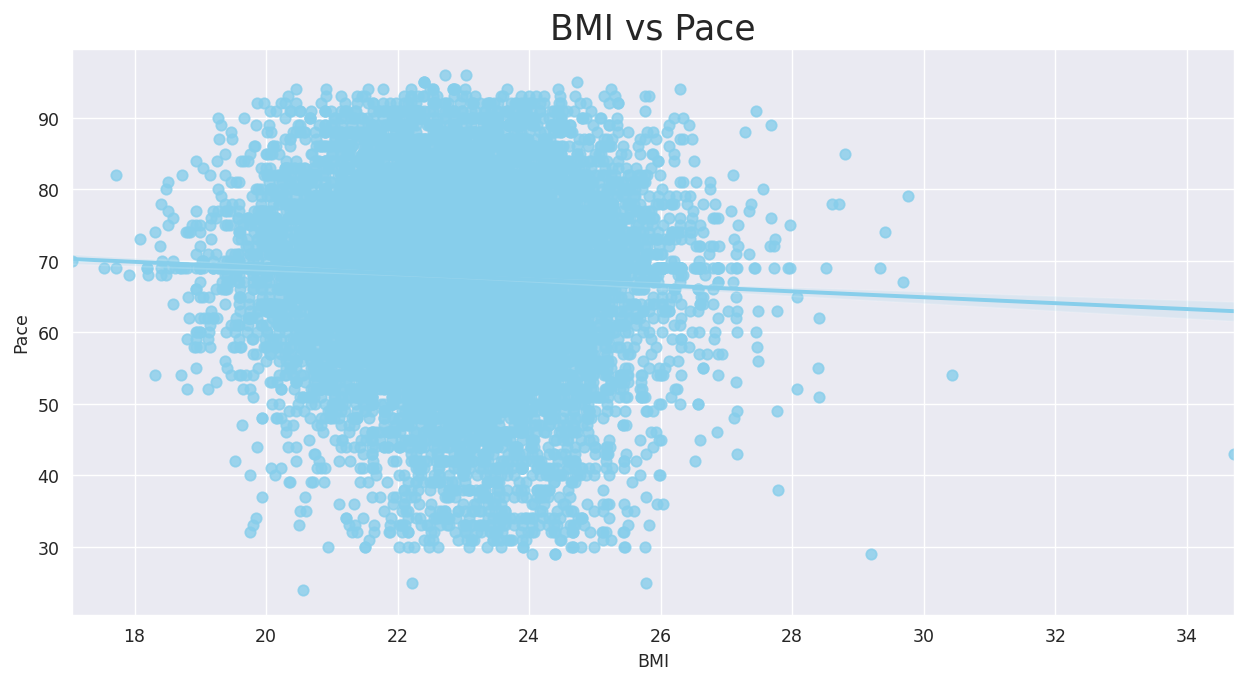

In [35]:
plt.figure(figsize=(12,6),dpi=125)
x=fifa_20['BMI']
y=fifa_20['pace']

sns.regplot(x,y,color='skyblue')
plt.title('BMI vs Pace',fontsize=20)
plt.xlabel('BMI')
plt.ylabel('Pace')
plt.show()

# **3.1 - Top 20 Analysis** 

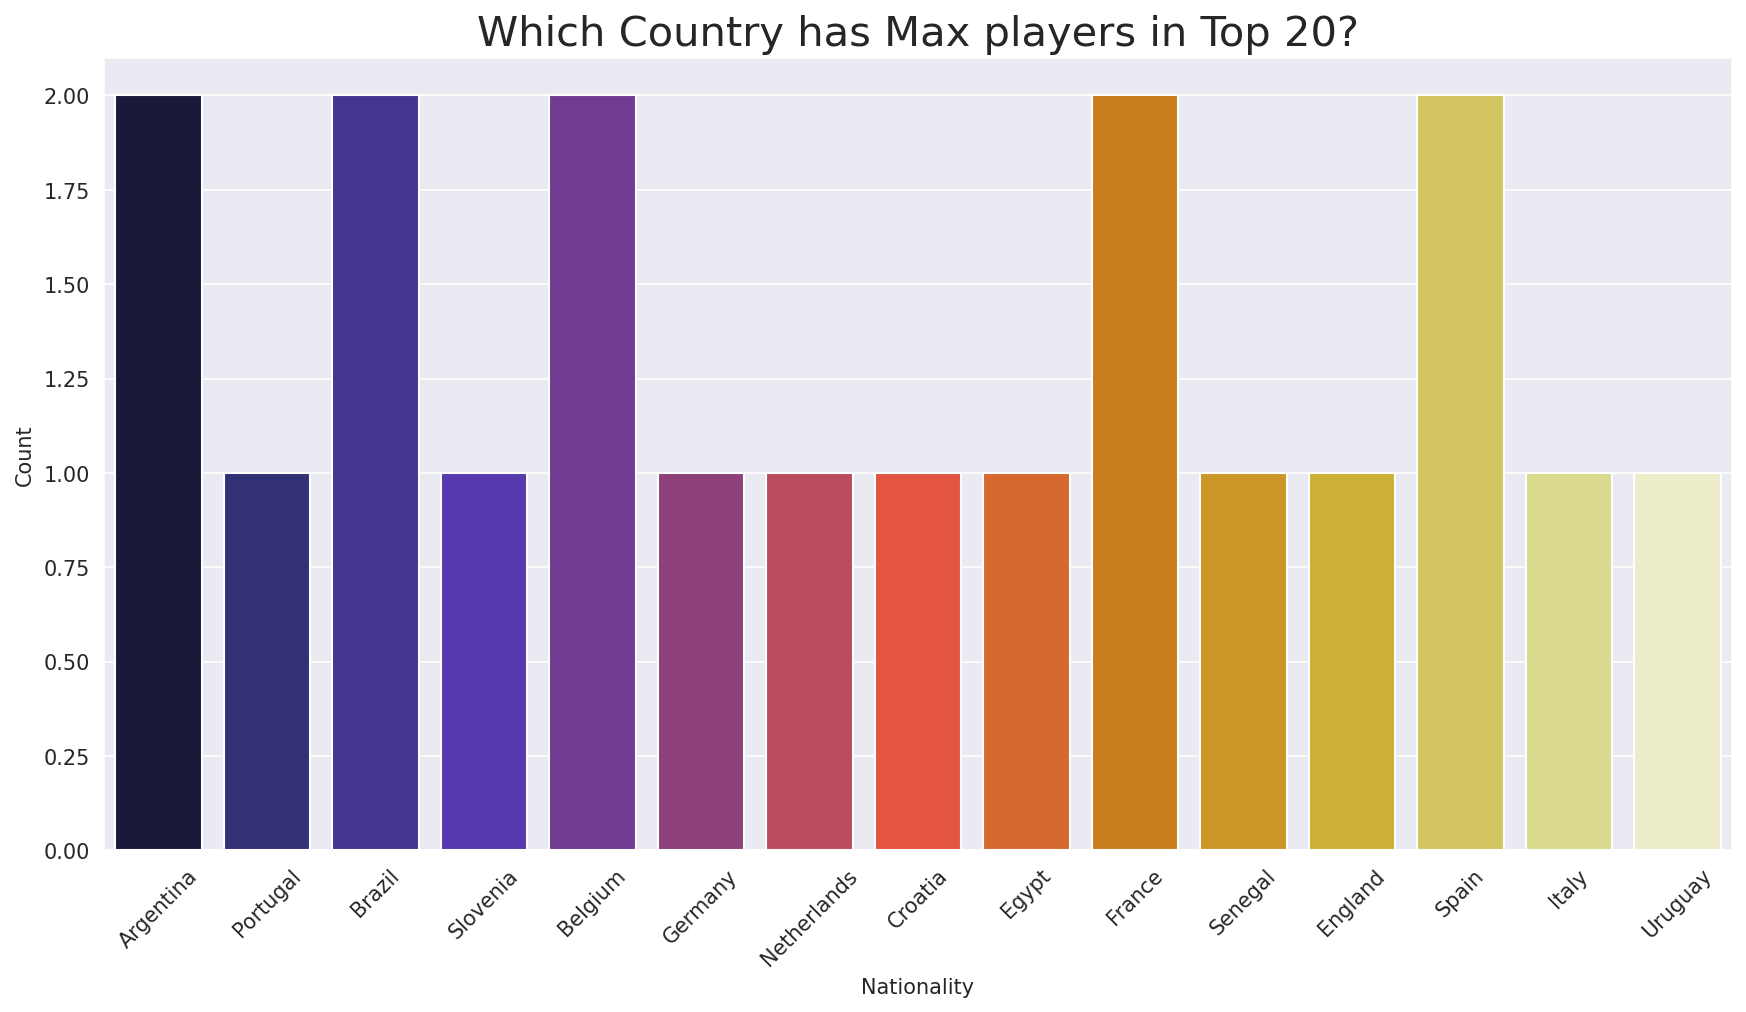

In [36]:
plt.figure(figsize=(14,7),dpi=150)
sns.countplot(x='nationality',data=fifa_20.head(20),palette='CMRmap')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Which Country has Max players in Top 20?',fontsize = 20)
plt.show()

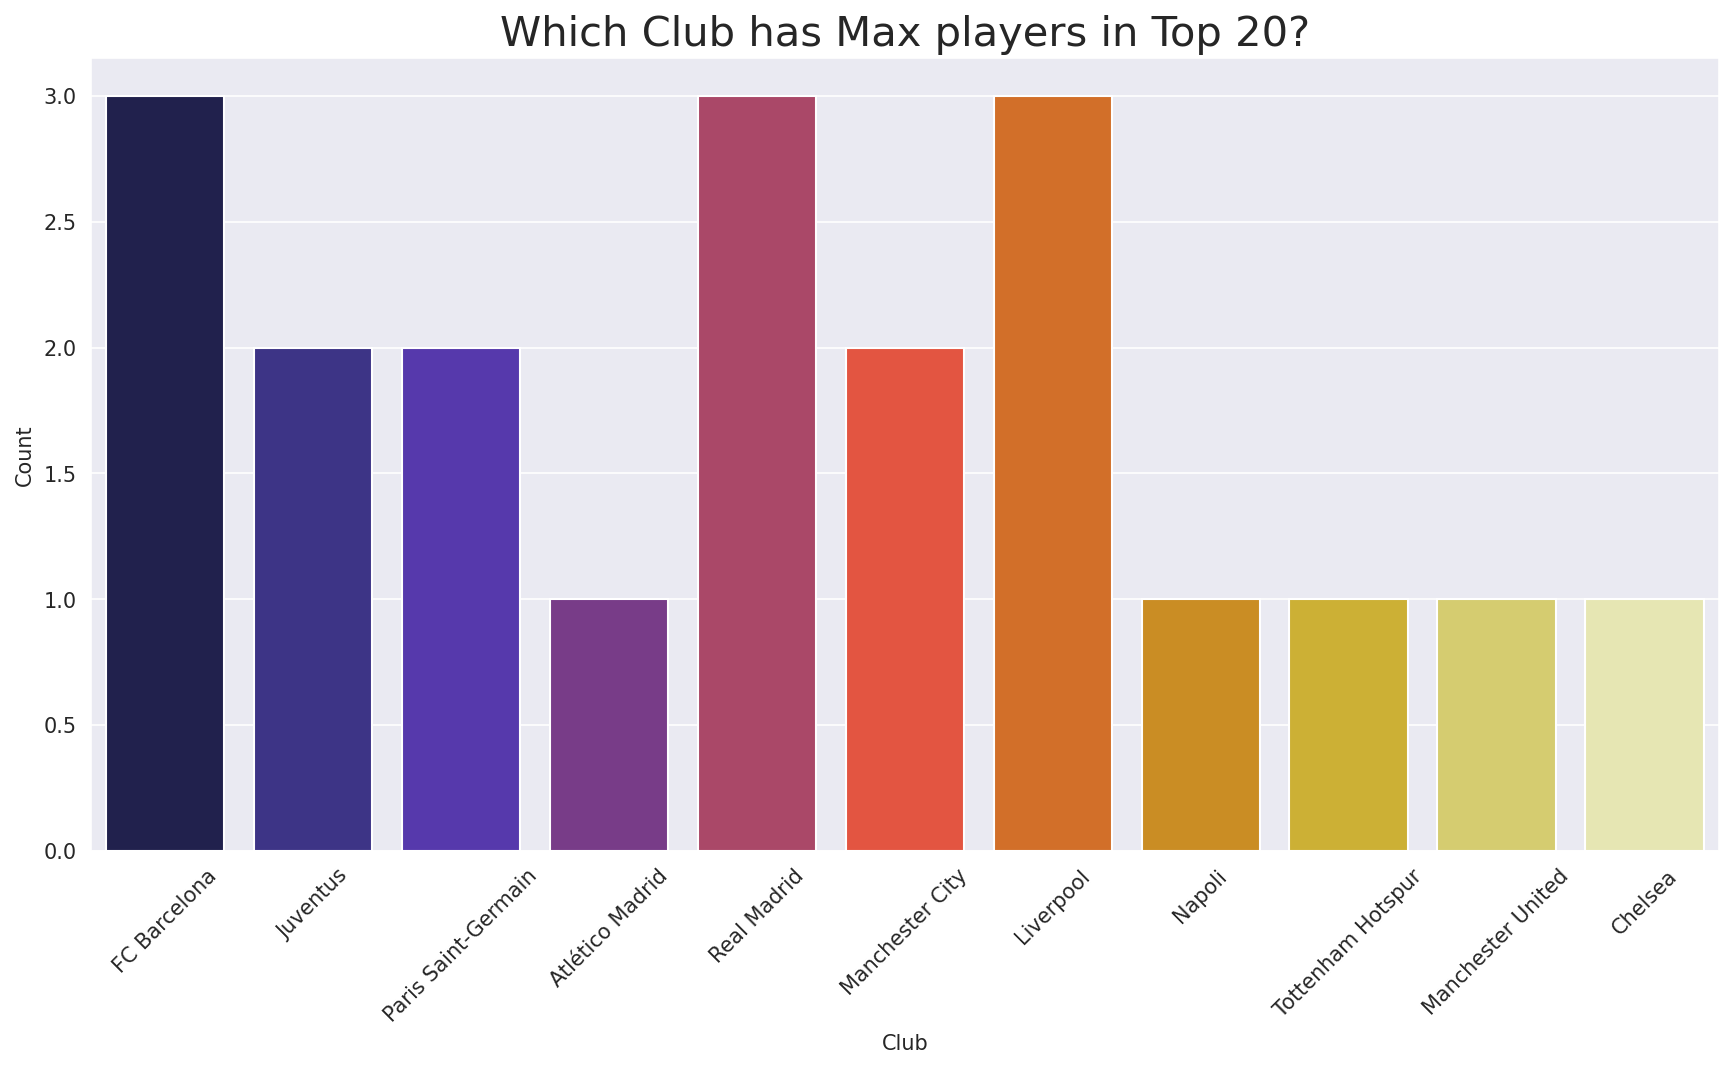

In [37]:
plt.figure(figsize=(14,7),dpi=150)
sns.countplot('club',data=fifa_20.head(20),palette='CMRmap')
plt.xlabel('Club')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Which Club has Max players in Top 20?',fontsize = 20)
plt.show()

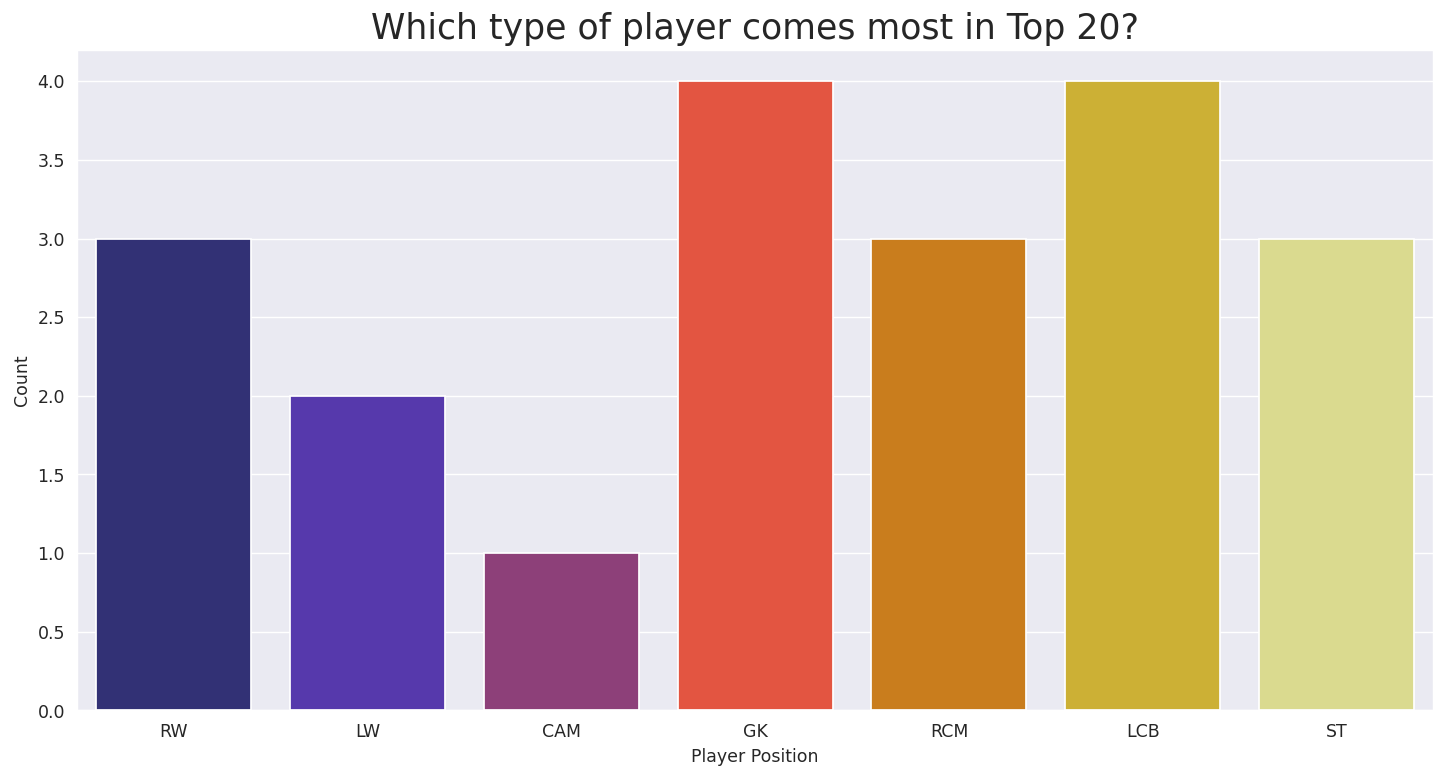

In [38]:
plt.figure(figsize=(14,7),dpi=125)
sns.countplot('team_position',data=fifa_20.head(20),palette='CMRmap')
plt.xlabel('Player Position')
plt.ylabel('Count')
plt.title('Which type of player comes most in Top 20?',fontsize = 20)
plt.show()

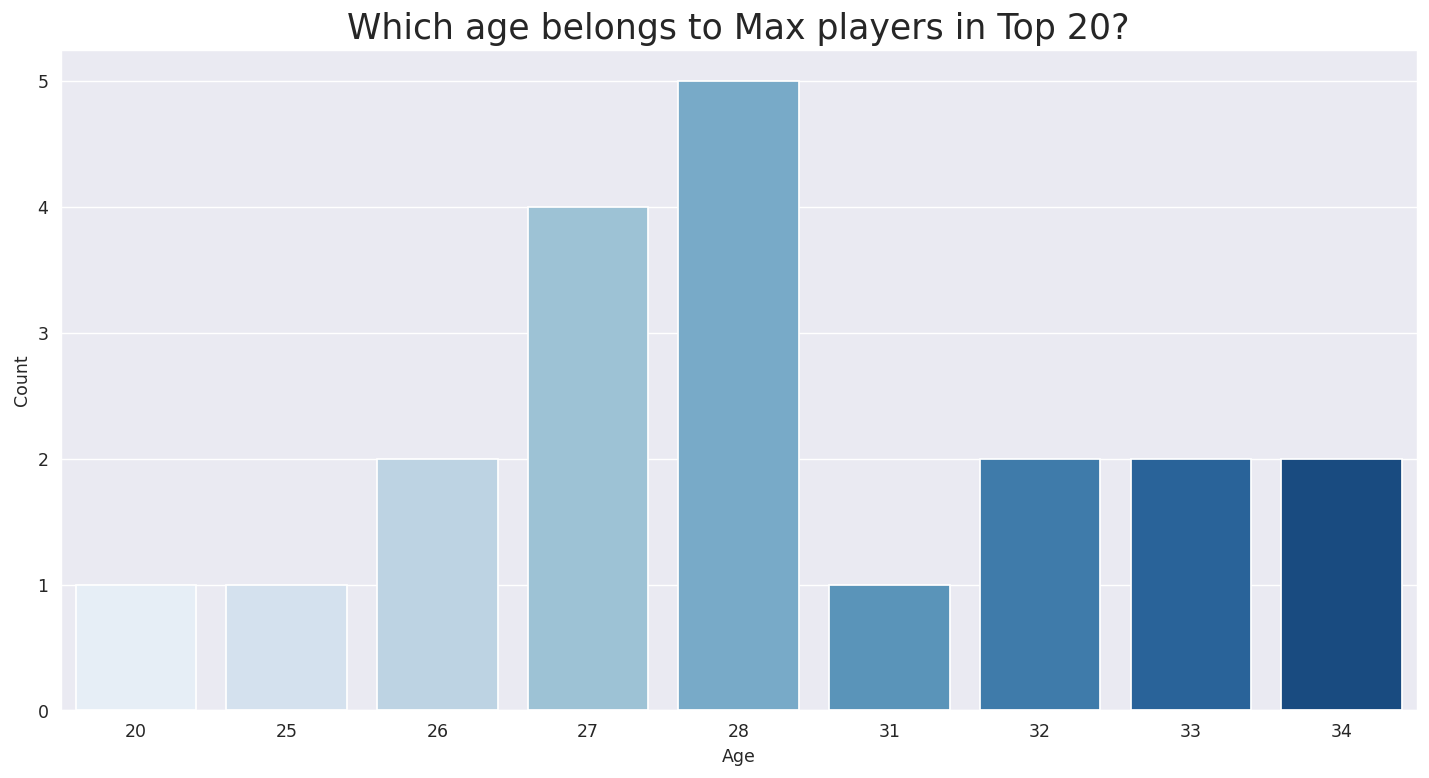

In [39]:
plt.figure(figsize=(14,7),dpi=125)
sns.countplot('age',data=fifa_20.head(20),palette='Blues')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Which age belongs to Max players in Top 20?',fontsize = 20)
plt.show()

# **3.2 - The Biggest Rivalry - MESSI VS RONALDO** 

In [40]:

column_r=['short_name','overall','potential','pace','shooting','passing','dribbling','defending','physic']
rival = fifa_20.head(2)[column_r]
rival= rival.set_index('short_name')
rival.head()

,overall,potential,pace,shooting,passing,dribbling,defending,physic
short_name,,,,,,,,
L. Messi,94,94,87.0,92.0,92.0,96.0,39.0,66.0
Cristiano Ronaldo,93,93,90.0,93.0,82.0,89.0,35.0,78.0


In [41]:
values = rival.iloc[0].tolist()
values += values [:1]
values

[94.0, 94.0, 87.0, 92.0, 92.0, 96.0, 39.0, 66.0, 94.0]

In [42]:
values2 = rival.iloc[1].tolist()
values2 += values2[:1]
values2

[93.0, 93.0, 90.0, 93.0, 82.0, 89.0, 35.0, 78.0, 93.0]

In [43]:
def RadarChart(player, data, player2, data2):
    Attributes = ["Overall","Potential","Pace","Shooting","Passing","Dribbling","Defending","Physical"]

    data += data [:1]
    data2 += data2 [:1]
    
    angles = [n / 8 * 2 * pi for n in range(8)]
    angles += angles [:1]
    
    angles2 = [n / 8 * 2 * pi for n in range(8)]
    angles2 += angles2 [:1]
    plt.figure(dpi=125)
    ax = plt.subplot(111, polar=True)
    ax = plt.subplot(111, polar=True)
    
    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,values)
    ax.fill(angles, values, 'teal', alpha=0.1)

    ax.plot(angles2,values2)
    ax.fill(angles2, values2, 'red', alpha=0.1)

    plt.figtext(0.1,0.98,player,color="steelblue")
    plt.figtext(0.1,0.94,"vs")
    plt.figtext(0.1,0.9,player2,color="darkorange")
    
    plt.show()

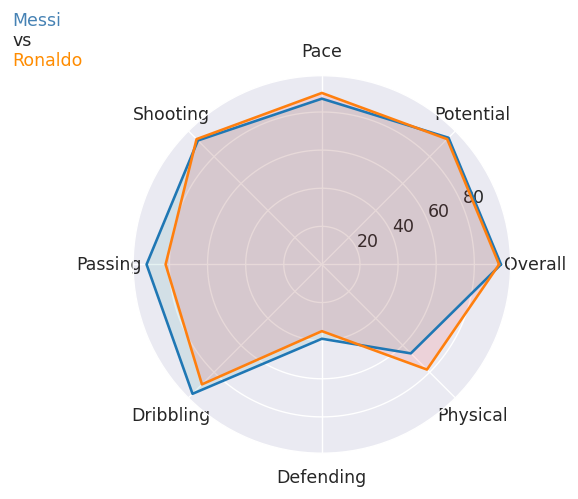

In [44]:
RadarChart("Messi",[94.0, 94.0, 87.0, 92.0, 92.0, 96.0, 39.0, 66.0, 94.0],"Ronaldo",[93.0, 93.0, 90.0, 93.0, 82.0, 89.0, 35.0, 78.0, 93.0])

**Insights:**
Out of 8 attributes - **Messi performed well in 5** and **Ronaldo in 3**

<img src= "https://media1.giphy.com/media/TjAcxImn74uoDYVxFl/200w.webp?cid=ecf05e47ohf8grax3pqbkyqlg3nbmlkid6a7hde9kosfzlkx&rid=200w.webp">

# **3.3 - Some other Top Class Comparisons**

In [45]:
column_r=['short_name','age','team_position','overall','potential','pace','shooting','passing','dribbling','defending','physic']
riv = fifa_20[column_r]
riv = riv.set_index(['short_name','team_position','age'])

In [46]:
def Radarchart(player, data, player2, data2):
    Attributes = ["Overall","Potential","Pace","Shooting","Passing","Dribbling","Defending","Physical"]

    data += data [:1]
    data2 += data2 [:1]
    
    angles = [n / 8 * 2 * pi for n in range(8)]
    angles += angles [:1]
    
    angles2 = [n / 8 * 2 * pi for n in range(8)]
    angles2 += angles2 [:1]
    plt.figure(dpi=125)
    ax = plt.subplot(111, polar=True)
    ax = plt.subplot(111, polar=True)
    
    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,value)
    ax.fill(angles, value, 'teal', alpha=0.1)

    ax.plot(angles2,value2)
    ax.fill(angles2, value2, 'red', alpha=0.1)
    plt.figtext(0.1,0.98,player,color="steelblue")
    plt.figtext(0.1,0.94,"vs")
    plt.figtext(0.1,0.9,player2,color="darkorange")
    
    plt.show()

Now let's compare top two Midfielders as per the dataset i.e **De Bryne** and **Modric**

In [47]:
# Let's find values for De Bryne - Man City's Midfielder
value = riv.iloc[5].tolist()
value += value[:1]
value

[91.0, 91.0, 76.0, 86.0, 92.0, 86.0, 61.0, 78.0, 91.0]

In [48]:
# Let's find values for Modric - Madrid's Midfielder
value2 = riv.iloc[8].tolist()
value2 += value2[:1]
value2

[90.0, 90.0, 74.0, 76.0, 89.0, 89.0, 72.0, 66.0, 90.0]

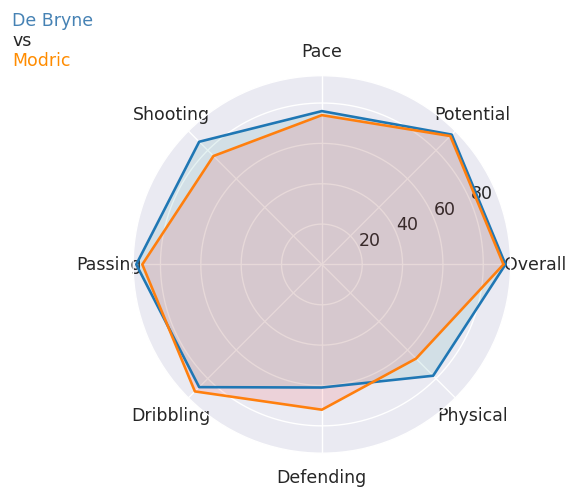

In [49]:
Radarchart("De Bryne",[91.0, 91.0, 76.0, 86.0, 92.0, 86.0, 61.0, 78.0, 91.0],"Modric",[90.0, 90.0, 74.0, 76.0, 89.0, 89.0, 72.0, 66.0, 90.0])

<img src="https://media3.giphy.com/media/l0HlGbzmlTORWvmYo/200w.webp?cid=ecf05e47fe28lkkh6bvz6u9gc0xwgxnf6jiyjwq8b6e64h49&rid=200w.webp">

Now let's compare top two Defenders of current era as per me i.e **Ramos** and **Van Dijk**

In [50]:
# Let's find values for Ramos - Madrids's Defender
value = riv.iloc[18].tolist()
value += value[:1]
value

[89.0, 89.0, 72.0, 68.0, 75.0, 73.0, 87.0, 85.0, 89.0]

In [51]:
# Let's find values for Van Dijk - Liverpools's Defender
value2 = riv.iloc[7].tolist()
value2 += value2[:1]
value2

[90.0, 91.0, 77.0, 60.0, 70.0, 71.0, 90.0, 86.0, 90.0]

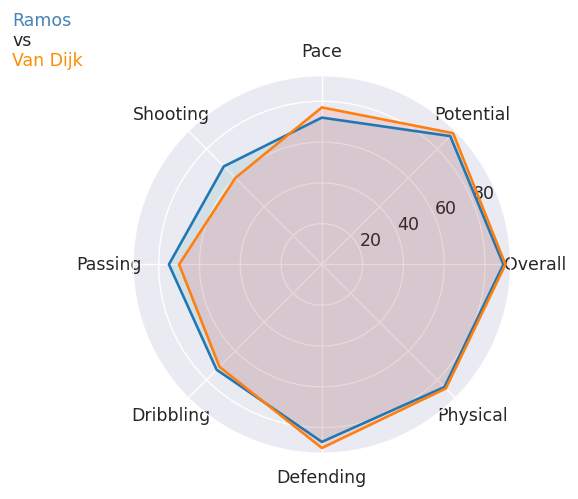

In [52]:
Radarchart("Ramos",[89.0, 89.0, 72.0, 68.0, 75.0, 73.0, 87.0, 85.0, 89.0],"Van Dijk",[90.0, 91.0, 77.0, 60.0, 70.0, 71.0, 90.0, 86.0, 90.0])

<img src="https://media0.giphy.com/media/gIeVrITp1dnLrtJINn/200w.webp?cid=ecf05e47qrlur0yn6weaopqy6mwz7zsdr0ddifn91ojtduqw&rid=200w.webp">

Now let's compare top two Strikers as per the dataset i.e **Kane** and **Aguero**

In [53]:
# Let's find values for Kane - Tottenham's Striker
value = riv.iloc[12].tolist()
value += value[:1]
value

[89.0, 91.0, 70.0, 91.0, 79.0, 81.0, 47.0, 83.0, 89.0]

In [54]:
# Let's find values for Aguero - Man City's Striker
value2 = riv.iloc[17].tolist()
value2 += value2[:1]
value2

[89.0, 89.0, 80.0, 90.0, 77.0, 88.0, 33.0, 74.0, 89.0]

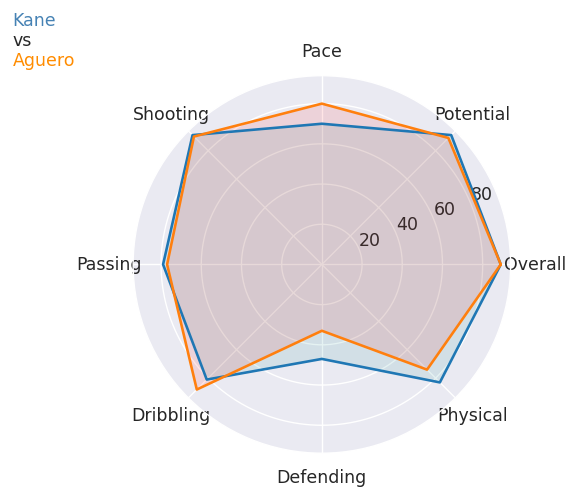

In [55]:
Radarchart("Kane",[89.0, 91.0, 70.0, 91.0, 79.0, 81.0, 47.0, 83.0, 89.0],"Aguero",[89.0, 89.0, 80.0, 90.0, 77.0, 88.0, 33.0, 74.0, 89.0])

<img src="https://media2.giphy.com/media/Xy76xcBjGyQ6mMDGux/200w.webp?cid=ecf05e47ywl8no38h6zo2l709l3ye7f7rcmvnp0ncwfdgco2&rid=200w.webp">

# **3.4 - Word Clouds**

In [56]:
from wordcloud import WordCloud

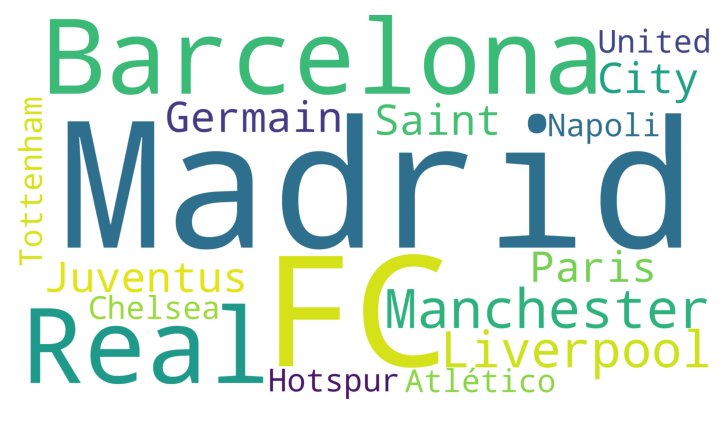

In [57]:
plt.subplots(dpi=150)
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(fifa_20.head(20)['club']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

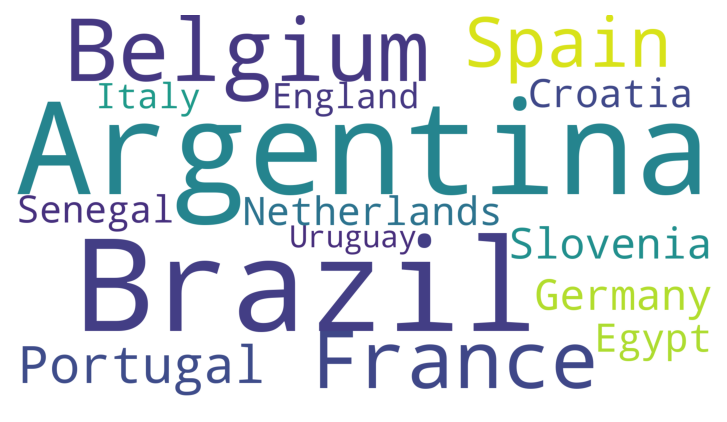

In [58]:
plt.subplots(dpi=150)
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(fifa_20.head(20)['nationality']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

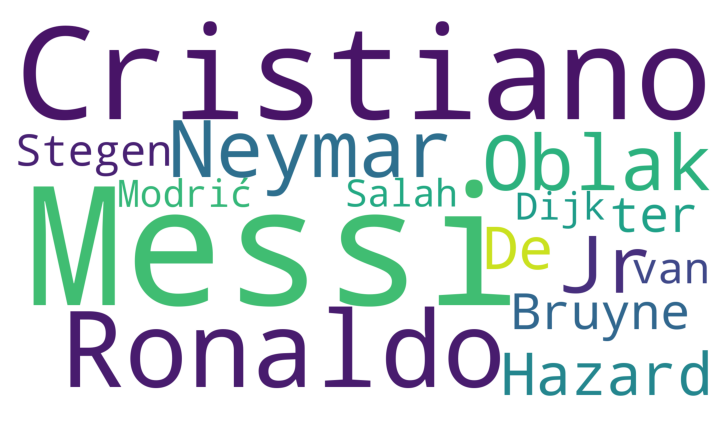

In [59]:
plt.subplots(dpi=150)
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(fifa_20.head(10)['short_name']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<h2 style='background:black; border:0; color:white'><center>Thank You for reading the kernel!</center><h2>

<img src ="https://media0.giphy.com/media/4PSESiw3VaSStOrPtq/200w.webp?cid=ecf05e4709o3p4kyc2t4w00xqhnfw0x78htw5xijisvom3e6&rid=200w.webp">